
Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [29]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


KNN Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.81      0.67        36
           1       0.29      0.12      0.17        17
           2       0.36      0.33      0.35        24
           3       0.00      0.00      0.00         5

    accuracy                           0.48        82
   macro avg       0.31      0.31      0.30        82
weighted avg       0.42      0.48      0.43        82

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69        36
           1       0.25      0.06      0.10        17
           2       0.38      0.62      0.47        24
           3       0.00      0.00      0.00         5

    accuracy                           0.50        82
   macro avg       0.33      0.34      0.31        82
weighted avg       0.47      0.50      0.46        82

KNN Classification Report:
               precision    recall  f

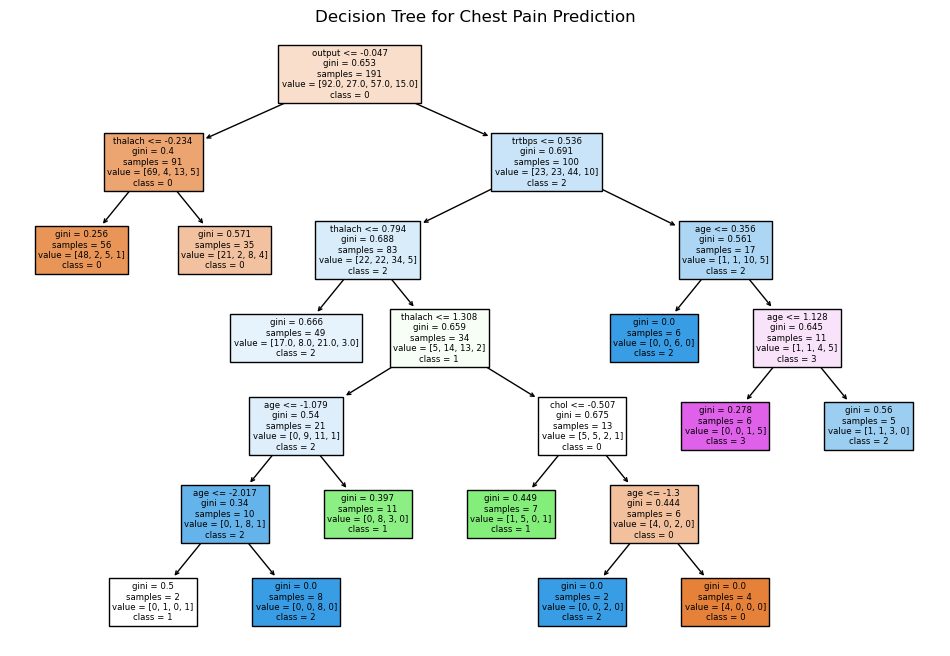

LDA Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71        36
           1       0.00      0.00      0.00        17
           2       0.39      0.67      0.49        24
           3       0.00      0.00      0.00         5

    accuracy                           0.51        82
   macro avg       0.27      0.35      0.30        82
weighted avg       0.42      0.51      0.46        82

First couple splits interpretation:

Feature importance: {'age': 0.3059626472962543, 'sex': 0.0, 'trtbps': 0.054097592584826014, 'chol': 0.06610355419246648, 'restecg': 0.0, 'thalach': 0.14396417792871294, 'output': 0.42987202799774027}
LDA Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71        36
           1       0.00      0.00      0.00        17
           2       0.39      0.67      0.49        24
           3       0.00      0.00      0.00         5



In [30]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
# variables
X = ha.drop(columns=['cp'])
y = ha['cp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), X.columns)
    ],
    remainder='passthrough'
)

knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

knn_pipeline.fit(X_train, y_train)
knn_predictions = knn_pipeline.predict(X_test)
print("KNN Classification Report:\n", classification_report(y_test, knn_predictions))

dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('decision_tree', DecisionTreeClassifier(random_state=42, ccp_alpha = 0.01))
])

dt_pipeline.fit(X_train, y_train)
dt_predictions = dt_pipeline.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_predictions))

dt_model = dt_pipeline.named_steps['decision_tree']
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=[str(cls) for cls in dt_model.classes_], filled=True)
plt.title("Decision Tree for Chest Pain Prediction")
plt.show()

lda_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lda', LinearDiscriminantAnalysis())
])


lda_pipeline.fit(X_train, y_train)
lda_predictions = lda_pipeline.predict(X_test)
print("LDA Classification Report:\n", classification_report(y_test, lda_predictions))

print("First couple splits interpretation:\n")
print(f"Feature importance: {dict(zip(X.columns, dt_model.feature_importances_))}")


## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [31]:
f1_scores = {}

# for loop
for cp_value in range(4):
    # Create a new binary column for the current cp_value
    ha[f'cp_is_{cp_value}'] = (ha['cp'] == cp_value).astype(int)
    
    # variables
    y = ha[f'cp_is_{cp_value}']
    X = ha.drop(columns=['cp', f'cp_is_{cp_value}'])
    
    # split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # standardize
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # logistic regression
    log_reg = LogisticRegression(random_state=42, max_iter=1000)
    log_reg.fit(X_train_scaled, y_train)
    y_pred = log_reg.predict(X_test_scaled)
    
    # f1 score
    f1_scores[f'cp_is_{cp_value}'] = f1_score(y_test, y_pred)

# print
print(f1_scores)

{'cp_is_0': 0.7027027027027027, 'cp_is_1': 0.0, 'cp_is_2': 0.8627450980392157, 'cp_is_3': 1.0}
{'cp_is_0': 0.7027027027027027, 'cp_is_1': 0.0, 'cp_is_2': 0.8627450980392157, 'cp_is_3': 1.0}


## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# fit logistic regression
def fit_logistic_regression_and_get_auc(X, y):
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    # standardize
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # logistic regression
    log_reg = LogisticRegression(random_state=42, max_iter=1000)
    log_reg.fit(X_train_scaled, y_train)
    y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate ROC-AUC
    auc = roc_auc_score(y_test, y_proba)
    return auc

# 0 and 1 cp types
ha_0_1 = ha[ha['cp'].isin([0, 1])].copy()
X_0_1 = ha_0_1.drop(columns=['cp'])
y_0_1 = (ha_0_1['cp'] == 1).astype(int) 

# roc and auc
auc_0_1 = fit_logistic_regression_and_get_auc(X_0_1, y_0_1)

# cp of 0 and 2
ha_0_2 = ha[ha['cp'].isin([0, 2])].copy()
X_0_2 = ha_0_2.drop(columns=['cp'])
y_0_2 = (ha_0_2['cp'] == 2).astype(int) 

# roc and auc
auc_0_2 = fit_logistic_regression_and_get_auc(X_0_2, y_0_2)

# cp of 0 and 3
ha_0_3 = ha[ha['cp'].isin([0, 3])].copy()
X_0_3 = ha_0_3.drop(columns=['cp'])
y_0_3 = (ha_0_3['cp'] == 3).astype(int)  

# roc and auc
auc_0_3 = fit_logistic_regression_and_get_auc(X_0_3, y_0_3)

# print
auc_results = {
    "0 vs 1": auc_0_1,
    "0 vs 2": auc_0_2,
    "0 vs 3": auc_0_3
}
print(auc_results)


{'0 vs 1': 1.0, '0 vs 2': 1.0, '0 vs 3': 1.0}
{'0 vs 1': 1.0, '0 vs 2': 1.0, '0 vs 3': 1.0}
